# MOLOCO Data Scientist Assesment- Abhishek Patil

### Contents:
* [Load Dataset](#Load-Dataset)
* [Part 1: Analytics](#Part-1:-Analytics)
    * [Question 1 (a)](#Question-1-(a))
    * [Question 1 (b)](#Question-1-(b))
    * [Question 1 (c)](#Question-1-(c))
    * [Question 1 (d)](#Question-1-(d))
* [Part 2: Regression](#Part-2:-Regression)

# Load Dataset 

In [ ]:
import pandas as pd
import os
from pathlib import Path
path = Path(os.getcwd())

In [2]:
df_1 = pd.read_excel('Adops & Data Scientist Sample Data.xlsx', sheet_name = 0)
df_2 = pd.read_excel('Adops & Data Scientist Sample Data.xlsx', sheet_name = 1, header = None)

# Part 1: Analytics

In [19]:
df_1.head()

,ts,user_id,country_id,site_id
0,2019-02-01 00:01:24,LC36FC,TL6,N0OTG
1,2019-02-01 00:10:19,LC39B6,TL6,N0OTG
2,2019-02-01 00:21:50,LC3500,TL6,N0OTG
3,2019-02-01 00:22:50,LC374F,TL6,N0OTG
4,2019-02-01 00:23:44,LCC1C3,TL6,QGO3G


In [5]:
# Check for missing values
df_1.isna().sum()

ts            0
user_id       0
country_id    0
site_id       0
dtype: int64

## Question 1 (a)

In [6]:
df_1_BDV = df_1[df_1['country_id'] == 'BDV']
len(df_1_BDV)

844

In [15]:
df_1_BDV.groupby('site_id')['user_id'].nunique().sort_values(ascending = False)

site_id
5NPAU    544
N0OTG     90
3POLC      2
Name: user_id, dtype: int64

"5NPAU" has the highest number of unique visitors (544).

## Question 1 (b)

In [8]:
print(df_1['ts'].dtype)
df_1['ts'] = pd.to_datetime(df_1['ts'])
print(df_1['ts'].dtype)

object
datetime64[ns]


In [9]:
df_temp = df_1[(df_1['ts'] >= '2019-02-03 00:00:00') & (df_1['ts'] <= '2019-02-04 23:59:59')]
df_temp

,ts,user_id,country_id,site_id
1049,2019-02-03 00:02:31,LC3C7E,TL6,3POLC
1050,2019-02-03 00:03:09,LC3C7E,TL6,3POLC
1051,2019-02-03 00:03:46,LC3C7E,TL6,3POLC
1052,2019-02-03 00:04:12,LC3C7E,TL6,3POLC
1053,2019-02-03 00:04:25,LC3C7E,TL6,3POLC
...,...,...,...,...
2075,2019-02-04 23:54:56,LC34B0,XA7,N0OTG
2076,2019-02-04 23:55:46,LC3DEA,TL6,N0OTG
2077,2019-02-04 23:56:12,LC06C3,TL6,N0OTG
2078,2019-02-04 23:56:54,LC06C3,TL6,N0OTG


In [10]:
df_1_Q2 = df_temp.groupby(['user_id', 'site_id'])['ts'].count().reset_index()
df_1_Q2.columns = ['user_id', 'site_id', 'number of visits']
df_1_Q2[df_1_Q2['number of visits'] > 10]

,user_id,site_id,number of visits
3,LC06C3,N0OTG,25
417,LC3A59,N0OTG,26
485,LC3C7E,3POLC,15
493,LC3C9D,N0OTG,17


## Question 1 (c)

In [11]:
df_1_Q3 = df_1[['user_id','ts']].groupby('user_id').max()
df_1_Q3 = df_1_Q3.merge(df_1, on=['ts','user_id'])
df_1_Q3 = df_1_Q3.groupby('site_id').user_id.nunique()
df_1_Q3 = df_1_Q3.reset_index().rename(columns={'user_id':'num_of_users'})
df_1_Q3.sort_values(by = 'num_of_users', ascending = False).reset_index(drop=True).head(3)

,site_id,num_of_users
0,5NPAU,992
1,N0OTG,561
2,QGO3G,289


## Question 1 (d)

In [12]:
df_1_first = df_1.groupby('user_id').first()
df_1_last = df_1.groupby('user_id').last()

df_result = df_1_first.merge(df_1_last, on=['user_id','site_id'], how='inner')
df_result.head()

,ts_x,country_id_x,site_id,ts_y,country_id_y
user_id,,,,,
LC00C3,2019-02-03 18:52:50,QLT,5NPAU,2019-02-03 18:52:50,QLT
LC01C3,2019-02-04 11:35:10,QLT,5NPAU,2019-02-04 11:35:10,QLT
LC05C3,2019-02-02 14:14:44,BDV,5NPAU,2019-02-02 14:14:44,BDV
LC06C3,2019-02-01 22:49:39,TL6,N0OTG,2019-02-07 01:16:12,TL6
LC07C3,2019-02-05 19:06:42,BDV,5NPAU,2019-02-05 19:06:42,BDV


In [13]:
len(df_result)

1670

# Part 2: Regression

In [21]:
df_2.columns = ['A', 'B', 'C']
df_2.head()

,A,B,C
0,0.490142,-0.179654,11.536508
1,-1.414793,-1.225605,11.828531
2,0.943066,4.506148,-3.235349
3,3.569090,5.068347,-23.891922
4,-1.702460,6.905051,-22.125437


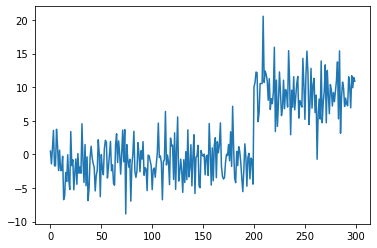

In [25]:
import matplotlib.pyplot as plt
plt.plot(df_2['A'])

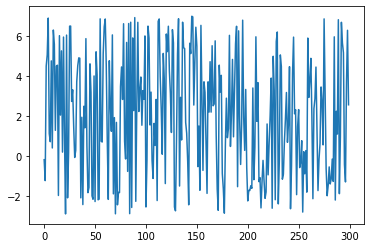

In [26]:
plt.plot(df_2['B'])

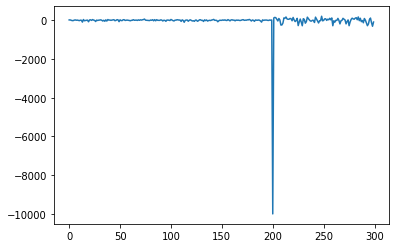

In [27]:
plt.plot(df_2['C'])

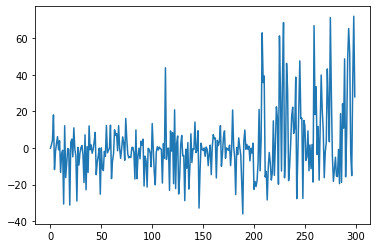

In [29]:
df_2['AxB'] = df_2['A'] * df_2['B']
plt.plot(df_2['AxB'])